<img src="https://raw.githubusercontent.com/ProjectPythiaCookbooks/radar-cookbook/main/thumbnail.png" width=500 alt="ARM Logo"></img>

# ACT Basics
---

## Overview
In this tutorial, you will learn some of the basic features of ACT! We we walk through the different displays you can use, and some of the helpful functionality ACT provides.

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Basic plotting |
| [NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html) | Helpful | Basic arrays |

- **Time to learn**: 30 minutes
---

## Installation

If you don't have ACT already installed, it can be installed using pip or conda using the commands below.  Additional information on installation can be found in the __[ACT User Guide](https://arm-doe.github.io/ACT/userguide/index.html)__. 

`pip install act-atmos`

`conda install -c conda-forge act-atmos`

Some features of ACT are only available if you have some optional dependencies installed.  For example, Skew-T plots of radiosonde data will require that __[MetPy](https://unidata.github.io/MetPy/latest/index.html)__ is installed.  Additional optional dependencies are listed in __[ACT's documentation](https://arm-doe.github.io/ACT/index.html)__

## Imports
First we are going to start by importing all the necessary python libraries that we need which is just act and matplotlib.

In [1]:
import act
import matplotlib.pyplot as plt

## Download ARM Data
Next we are going to download the data we are going to use for this session using the __[ARM Live Data webservice](https://adc.arm.gov/armlive/)__.  

Once you have an ARM account, you should be able to utilize this webservice as well.  All you need to do is login to get your token. We have setup a sample token for you in this workshop, shown below!

In [2]:
# Set your own username and token if you have it
username = 'armlive_training'
token = '6f097a7b99e39d19'

# ACT module for downloading data from the ARM web service
results = act.discovery.download_data(username, token, 'gucmfrsr7nchM1.b1', '2022-12-02', '2022-12-02')

[DOWNLOADING] gucmfrsr7nchM1.b1.20221202.080000.nc


## Reading in a NetCDF File
Congratulations, you just downloaded a file from just the command line!  Next up is to read the file into an xarray object using the ACT reader.  We then can use Jupyter to print out an interactive listing of everything in the object.

In [3]:
ds = act.io.armfiles.read_netcdf(results)
ds

<xarray.Dataset>
Dimensions:                                  (time: 4320, bench_angle: 181,
                                              wavelength: 750)
Coordinates:
  * time                                     (time) datetime64[ns] 2022-12-02...
  * bench_angle                              (bench_angle) float32 0.0 ... 180.0
Dimensions without coordinates: wavelength
Data variables: (12/158)
    base_time                                datetime64[ns] 2022-12-02
    time_offset                              (time) datetime64[ns] 2022-12-02...
    hemisp_narrowband_filter1                (time) float32 dask.array<chunksize=(4320,), meta=np.ndarray>
    qc_hemisp_narrowband_filter1             (time) int32 dask.array<chunksize=(4320,), meta=np.ndarray>
    hemisp_narrowband_filter2                (time) float32 dask.array<chunksize=(4320,), meta=np.ndarray>
    qc_hemisp_narrowband_filter2             (time) int32 dask.array<chunksize=(4320,), meta=np.ndarray>
    ...                                       ...
    nominal_calibration_factor_filter5       float32 ...
    nominal_calibration_factor_filter6       float32 ...
    nominal_calibration_factor_filter7       float32 ...
    lat                                      float32 ...
    lon                                      float32 ...
    alt                                      float32 ...
Attributes: (12/38)
    command_line:                mfrsr7nch_ingest -s guc -f M1
    Conventions:                 ARM-1.2
    process_version:             ingest-mfrsr7nch-1.8-0.el7
    dod_version:                 mfrsr7nch-b1-1.1
    input_source:                /data/collection/guc/gucmfrsr7nchM1.00/MFRSR...
    site_id:                     guc
    ...                          ...
    doi:                         10.5439/1429369
    history:                     created by user dsmgr on machine prod-proc1....
    _file_dates:                 ['20221202']
    _file_times:                 ['080000']
    _datastream:                 gucmfrsr7nchM1.b1
    _arm_standards_flag:         1

## Clean up the object to CF Standards
In order to utilize all the ACT QC modules, we need to clean up the object to follow __[Climate and Forecast (CF) standards](https://cfconventions.org/)__.  

In [4]:
ds.clean.cleanup()
ds

<xarray.Dataset>
Dimensions:                                  (time: 4320, bench_angle: 181,
                                              wavelength: 750)
Coordinates:
  * time                                     (time) datetime64[ns] 2022-12-02...
  * bench_angle                              (bench_angle) float32 0.0 ... 180.0
Dimensions without coordinates: wavelength
Data variables: (12/158)
    base_time                                datetime64[ns] 2022-12-02
    time_offset                              (time) datetime64[ns] 2022-12-02...
    hemisp_narrowband_filter1                (time) float32 dask.array<chunksize=(4320,), meta=np.ndarray>
    qc_hemisp_narrowband_filter1             (time) int32 dask.array<chunksize=(4320,), meta=np.ndarray>
    hemisp_narrowband_filter2                (time) float32 dask.array<chunksize=(4320,), meta=np.ndarray>
    qc_hemisp_narrowband_filter2             (time) int32 dask.array<chunksize=(4320,), meta=np.ndarray>
    ...                                       ...
    nominal_calibration_factor_filter5       float32 ...
    nominal_calibration_factor_filter6       float32 ...
    nominal_calibration_factor_filter7       float32 ...
    lat                                      float32 ...
    lon                                      float32 ...
    alt                                      float32 ...
Attributes: (12/31)
    command_line:                mfrsr7nch_ingest -s guc -f M1
    Conventions:                 ARM-1.2
    process_version:             ingest-mfrsr7nch-1.8-0.el7
    dod_version:                 mfrsr7nch-b1-1.1
    input_source:                /data/collection/guc/gucmfrsr7nchM1.00/MFRSR...
    site_id:                     guc
    ...                          ...
    doi:                         10.5439/1429369
    history:                     created by user dsmgr on machine prod-proc1....
    _file_dates:                 ['20221202']
    _file_times:                 ['080000']
    _datastream:                 gucmfrsr7nchM1.b1
    _arm_standards_flag:         1

### First Visualization
Let's plot up some data to see what we're working with.  For this example, we'll use hemisp_narrowband_filter2

/opt/homebrew/Caskroom/miniforge/base/envs/arm-cookbook-dev/lib/python3.9/site-packages/act/utils/datetime_utils.py:132: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(np.diff(time))


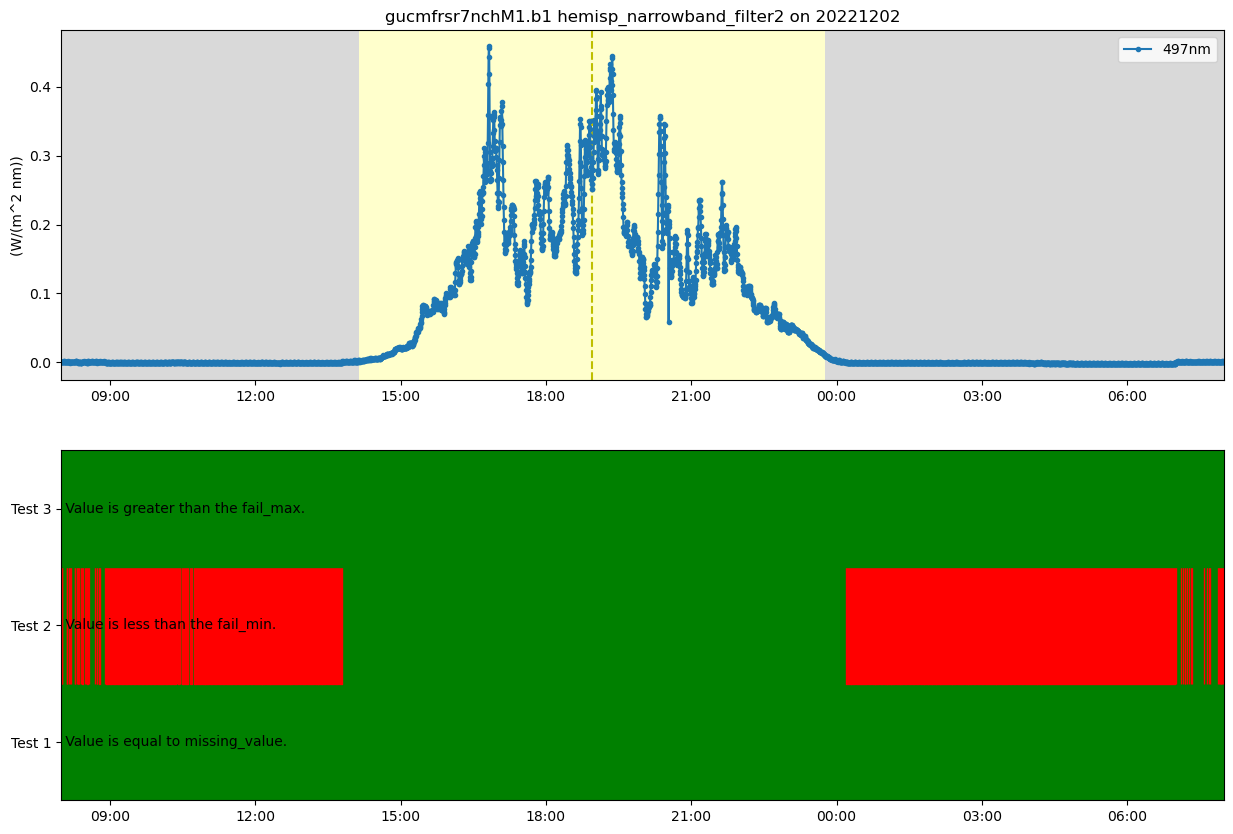

In [5]:
variable = 'hemisp_narrowband_filter2'

# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds, figsize=(15, 10), subplot_shape=(2,))

# Plot up the diffuse variable in the first plot
display.plot(variable, subplot_index=(0,), label='497nm')

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up the QC variable in the second plot
display.qc_flag_block_plot(variable, subplot_index=(1,))

plt.show()

## Filter Data

Let's try and filter some of those outliers out based on the embedded QC in the files.

/opt/homebrew/Caskroom/miniforge/base/envs/arm-cookbook-dev/lib/python3.9/site-packages/act/utils/datetime_utils.py:132: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(np.diff(time))


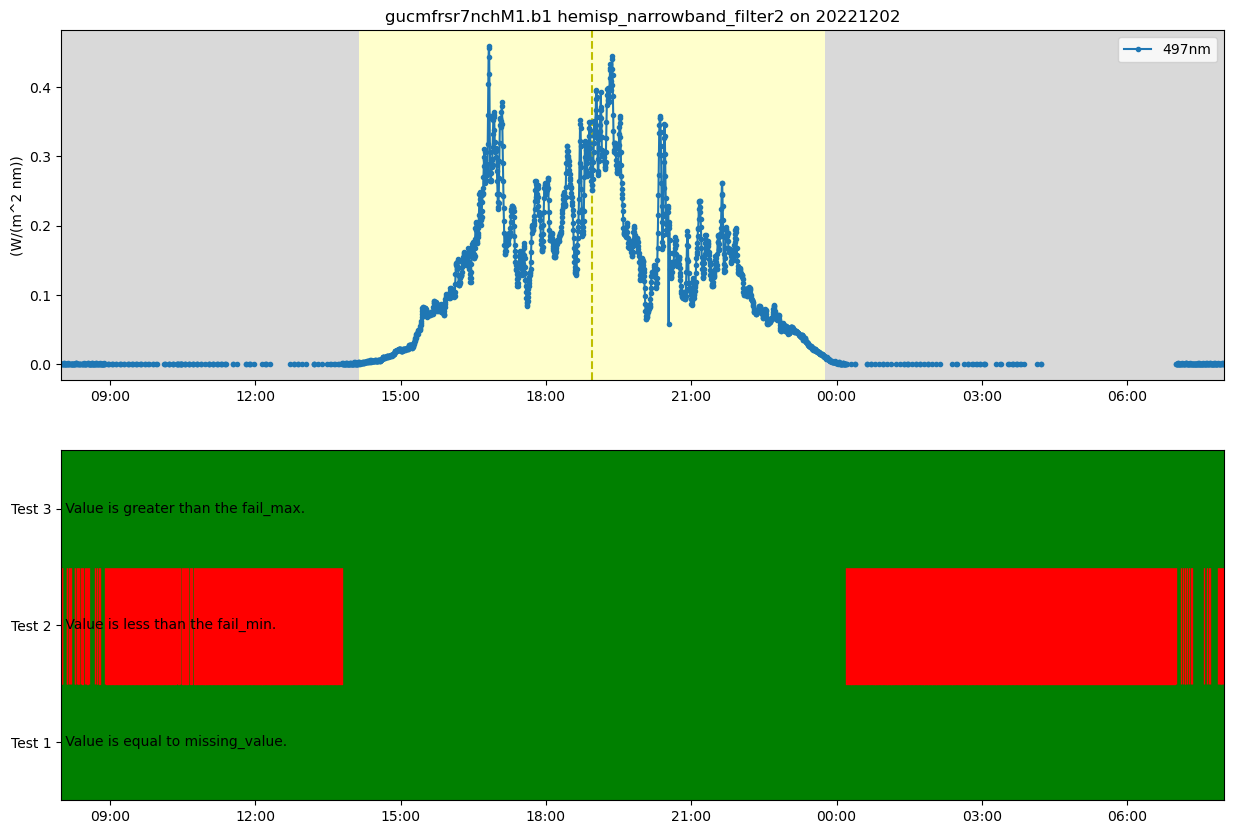

In [6]:
# Now lets remove some of these outliers
ds.qcfilter.datafilter(variable, rm_tests=[2, 3], del_qc_var=False)

# And plot the data again
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds, figsize=(15, 10), subplot_shape=(2,))

# Plot up the diffuse variable in the first plot
display.plot(variable, subplot_index=(0,), label='497nm')

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up the QC variable in the second plot
display.qc_flag_block_plot(variable, subplot_index=(1,))

plt.show()

## Instrument Specific QC Tests
ACT has a growing library of instrument specific tests such as the __[fast-fourier transform test](https://arm-doe.github.io/ACT/API/generated/act.qc.fft_shading_test.html#act.qc.fft_shading_test)__ to detect shading which was adapted from Alexandrov et al 2007.  The adaption is that it is applied in a moving window style approach.  **Note - Check out the webpage as an example of how we are including references to papers behind the codes**

Let's apply it and see how it compares with the DQR!

/opt/homebrew/Caskroom/miniforge/base/envs/arm-cookbook-dev/lib/python3.9/site-packages/act/utils/datetime_utils.py:132: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(np.diff(time))
/opt/homebrew/Caskroom/miniforge/base/envs/arm-cookbook-dev/lib/python3.9/site-packages/act/utils/datetime_utils.py:132: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

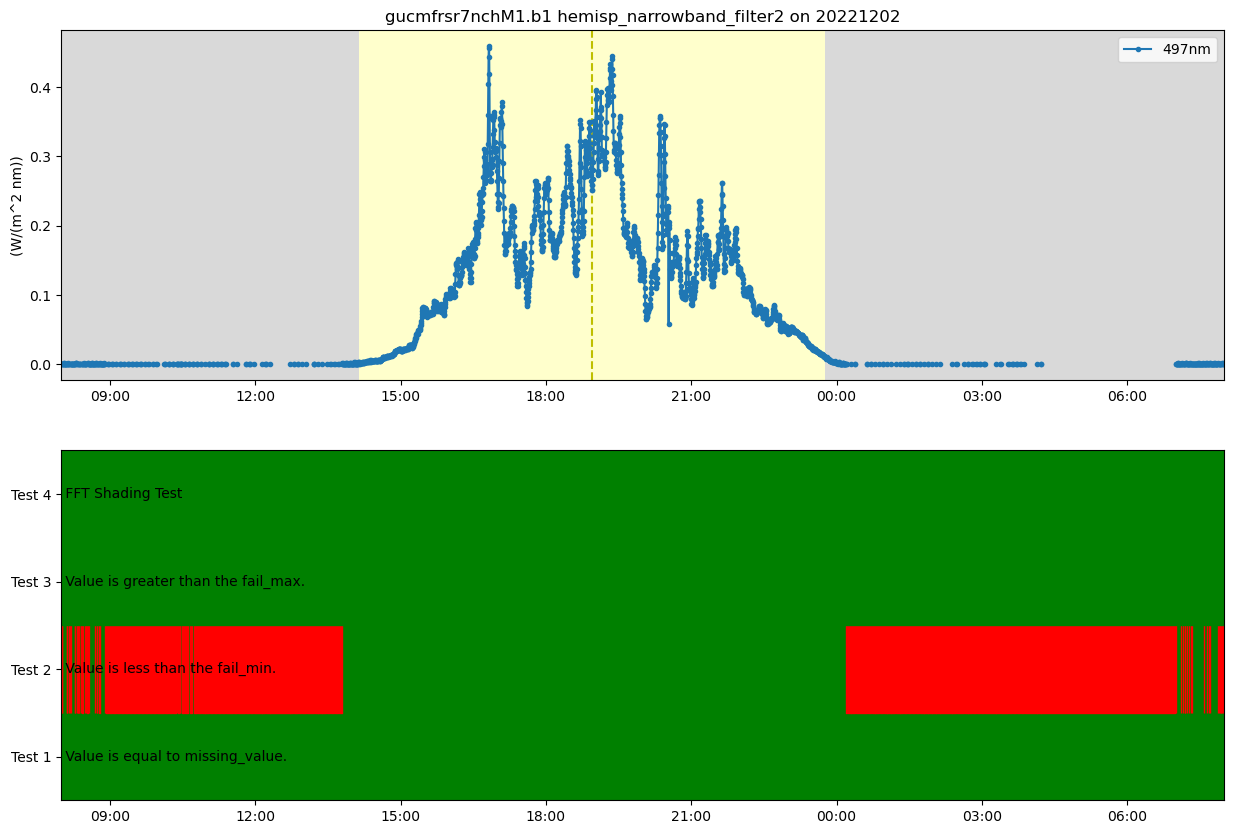

In [7]:
# Apply test
ds = act.qc.fft_shading_test(ds, variable=variable)

# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds, figsize=(15, 10), subplot_shape=(2,))

# Plot up the diffuse variable in the first plot
display.plot(variable, subplot_index=(0,), label='497nm')

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up the QC variable in the second plot
display.qc_flag_block_plot(variable, subplot_index=(1,))

plt.show()

## Conclusion
In this tutorial, we have shown you how to download data from ARM's Data Live web service, visualize the data and QC information, filter data based on the QC, and add new QC tests to the dataset.  After all this work, you can easily save the xarray object to a NetCDF file using `obj.to_netcdf('filename.nc')` and all that data will be saved and usable in Python and ACT.

Please checkout the __[ACT Github repository](https://github.com/ARM-DOE/ACT)__ for the latest and greatest information, including our documentation which has __[examples](https://arm-doe.github.io/ACT/source/auto_examples/index.html)__ that can be downloading in python or Jupyter Notebook formats.

# Second ACT!

But wait, there's more to ACT that we can explore together or that you can do on your own!  These examples are going to be more condensed than the above but should still provide you the insight you need to run and do your own things!

We are going to need some additional libraries to help out though!

## Imports

In [8]:
import numpy as np

## Wind Roses

[DOWNLOADING] gucmetM1.b1.20221202.000000.cdf


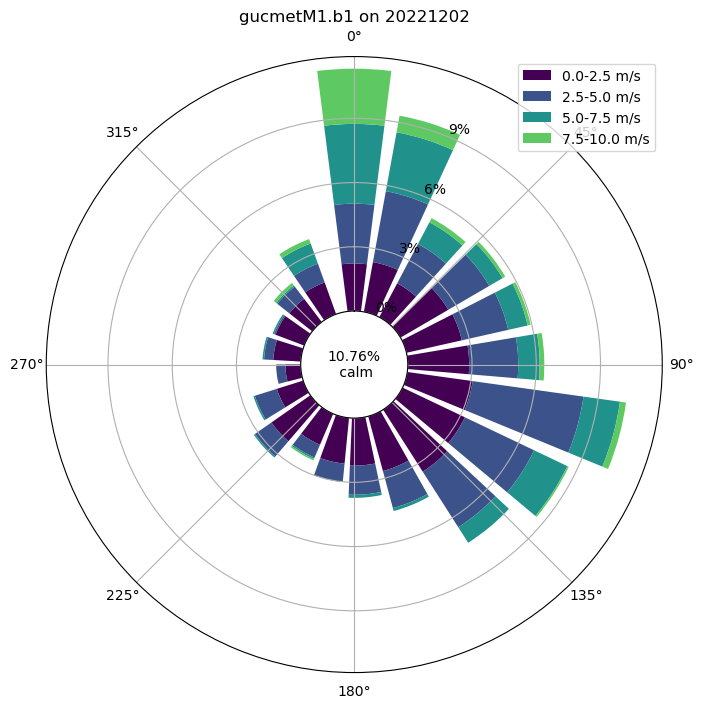

In [9]:
username = 'armlive_training'
token = '6f097a7b99e39d19'

# Let's download surface meteorological data from the ARM AMF2 SAIL Site in Gunnison, CO!
results = act.discovery.download_data(username, token, 'gucmetM1.b1', '2022-12-02', '2022-12-02')

# Read that data into an object
ds = act.io.armfiles.read_netcdf(results)

# Now we can plot up a wind rose of that entire month's worth of data
windrose = act.plotting.WindRoseDisplay(ds, figsize=(10,8))
windrose.plot('wdir_vec_mean', 'wspd_vec_mean', spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.savefig("sample-wind-rose-plot.png", dpi=300)
plt.show()

## Present Weather Detector Codes
With the MET system at the main site, there's also a present weather detector (PWD) deployed.  This PWD reports the present weather in WMO codes but can be easily decoded using a __[utility in ACT](https://arm-doe.github.io/ACT/API/generated/act.utils.decode_present_weather.html?highlight=present%20weather#act.utils.decode_present_weather)__.  With this information, you can make fancy plots like the __[DQ Office plots for the PWD](https://plot.dmf.arm.gov/PLOTS/guc/comparison/20221202/gucM1.full_precip_comparison.20221202.png)__.

In [10]:
# Let's just use one of the files from the previous example
ds = act.io.armfiles.read_netcdf(results)

# Pass it to the function to decode it along with the variable name
ds = act.utils.inst_utils.decode_present_weather(ds, variable='pwd_pw_code_inst')

# We're going to print out the first 10 decoded values that weren't 0
# This shows the utility of also being able to use the built-in xarray
# features like where!
print(list(ds['pwd_pw_code_inst_decoded'].where(ds.pwd_pw_code_inst > 0, drop=True).values[0:10]))

['Snow, light', 'Snow, light', 'Snow, light', 'Snow, light', 'Snow, light', 'Snow, light', 'Snow, light', 'Snow, light', 'Snow, light', 'Rain, not freezing, slight']


## Doppler Lidar Wind Retrievals
This will show you how you can process the doppler lidar PPI scans to produce __[wind profiles](https://arm-doe.github.io/ACT/API/generated/act.retrievals.compute_winds_from_ppi.html#act.retrievals.compute_winds_from_ppi)__ based on Newsom et al 2016.   

[DOWNLOADING] gucdlppiM1.b1.20221202.104502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221202.110022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221202.094503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221202.100022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221202.103002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221202.090022.cdf
[DOWNLOADING] gucdlppiM1.b1.20221202.091502.cdf
[DOWNLOADING] gucdlppiM1.b1.20221202.093002.cdf
[DOWNLOADING] gucdlppiM1.b1.20221202.101503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221202.113003.cdf
[DOWNLOADING] gucdlppiM1.b1.20221202.111503.cdf
[DOWNLOADING] gucdlppiM1.b1.20221202.114503.cdf


/opt/homebrew/Caskroom/miniforge/base/envs/arm-cookbook-dev/lib/python3.9/site-packages/act/plotting/plot.py:80: UserWarning: Could not discern datastreamname and dict or tuple were not provided. Using defaultname of act_datastream!
  warnings.warn(


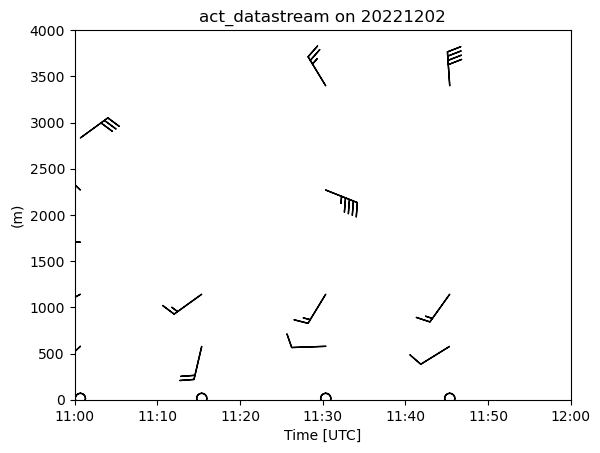

In [11]:
username = 'armlive_training'
token = '6f097a7b99e39d19'

# Let's download three hours of Doppler Lidar data from the ARM AMF2 SAIL Site in Gunnison, CO!
results = act.discovery.download_data(username, token, 'gucdlppiM1.b1', '2022-12-02T09:00:00', '2022-12-02T12:00:00')

# Read that data into an object (this will concatenate it all for you)
ds = act.io.armfiles.read_netcdf(results)

# Returns the wind retrieval information in a new object by default
# Note that the default snr_threshold of 0.008 was too high for the first profile
# Reducing it to 0.002 makes it show up but the quality of the data is likely suspect.
wind_ds = act.retrievals.compute_winds_from_ppi(ds, snr_threshold=0.002)

# Plot it up
display = act.plotting.TimeSeriesDisplay(wind_ds)
display.plot_barbs_from_spd_dir('wind_speed', 'wind_direction', invert_y_axis=False)

# Update the x-limits to make sure both wind profiles are shown
display.axes[0].set_xlim([np.datetime64('2022-12-02T11:00'), np.datetime64('2022-12-02T12:00')])
# Update the y-limits to focus on the boundary layer. 
display.axes[0].set_ylim([0, 4000])

plt.show()

## Radiosonde Plotting and More!

This will take you through how to plot up a Skew-T plot along with a geographic plot of the radiosonde track on a map.  Additionally, will run this through a retrieval to calculate the PBL height using the __[Liu Liang method](https://arm-doe.github.io/ACT/API/generated/act.retrievals.calculate_pbl_liu_liang.html?highlight=pbl#act.retrievals.calculate_pbl_liu_liang)__.

[DOWNLOADING] gucsondewnpnM1.b1.20221202.235900.cdf


/opt/homebrew/Caskroom/miniforge/base/envs/arm-cookbook-dev/lib/python3.9/site-packages/metpy/calc/thermo.py:1194: UserWarning: Duplicate pressure(s) [15.130000114440918] hPa provided. Output profile includes duplicate temperatures as a result.
  warnings.warn(f'Duplicate pressure(s) {unique[counts > 1]:~P} provided. '


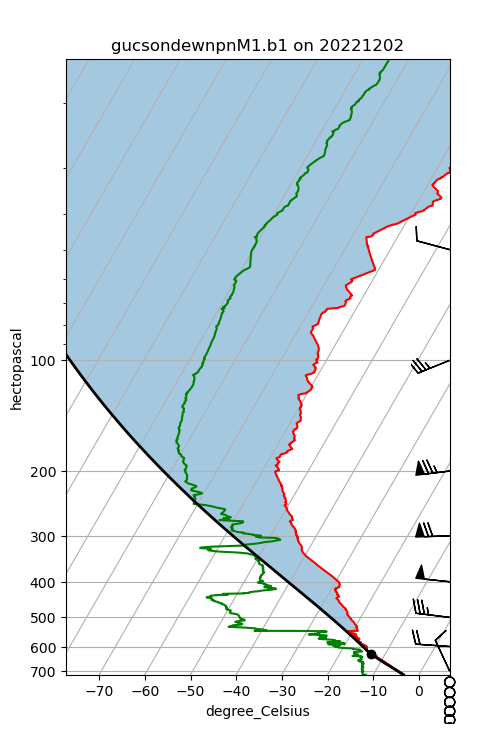

In [12]:
# Import MetPy if possible
import metpy

username = 'armlive_training'
token = '6f097a7b99e39d19'

# Let's download the second radiosonde launch of the 2 Dec 2022 event
results = act.discovery.download_data(username, token, 'gucsondewnpnM1.b1', '2022-12-02T12:00:00', '2022-12-02T23:59:00')

# Read that data into an object
ds = act.io.armfiles.read_netcdf(results)

# Read in the radiosonde data and plot up a Skew-T
#ds = act.io.armfiles.read_netcdf(act.tests.EXAMPLE_SONDE1)

skewt = act.plotting.SkewTDisplay(ds, figsize=(10, 8))
skewt.plot_from_u_and_v('u_wind', 'v_wind', 'pres', 'tdry', 'dp')

plt.show()

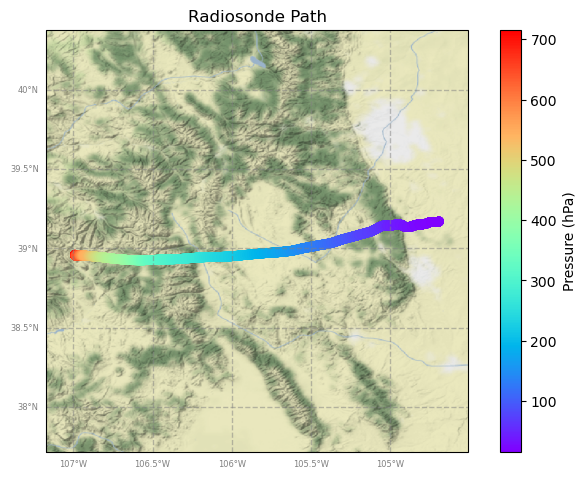

In [13]:
# Now let's plot up the radiosonde path on a map!
display = act.plotting.GeographicPlotDisplay(ds)
display.geoplot(data_field='pres', title='Radiosonde Path')
plt.show()

In [14]:
# We need to update the units on temperature before running the retrieval
ds.utils.change_units(variables='tdry', desired_unit='degree_Celsius')
obj = act.retrievals.calculate_pbl_liu_liang(ds)
print('Regime = ', obj['pblht_regime_liu_liang'].values, '\nPBL Height = ', int(obj['pblht_liu_liang'].values))

Regime =  NRL 
PBL Height =  4014


---

## Look at Data from SAIL
ACT is not just limited in ARM data... you can also work with data from other organizations, such as NOAA!

During the SAIL and SPLASH field campaigns in Colorado, they deployed a NOAA Snow Level Radar, "FMCW", around the domain. Let's download and plot some data! In addition to this radar data, we can also read in some Parsivel data, which is a Laser Disdrometer!

### Load in the Data
We use the `act.discovery` module to load in data for the PSL, and remotely read in the data for the Parsivel data.

In [15]:
# Use the ACT downloader to download a file from the
# Kettle Ponds site on 8/01/2022 between 2200 and 2300 UTC.
data_10_utc = act.discovery.download_noaa_psl_data(
    site='kps', instrument='Radar FMCW Moment', startdate='20221202', hour='10')
data_11_utc = act.discovery.download_noaa_psl_data(
    site='kps', instrument='Radar FMCW Moment', startdate='20221202', hour='11')

# Read in the .raw files from both hours. Spectra data are also downloaded.
radar_ds = act.io.noaapsl.read_psl_radar_fmcw_moment([data_10_utc[-1], data_11_utc[-1]])

# Read in the parsivel text files.
url = ['https://downloads.psl.noaa.gov/psd2/data/realtime/DisdrometerParsivel/Stats/kps/2022/336/kps2233610_stats.txt',
       'https://downloads.psl.noaa.gov/psd2/data/realtime/DisdrometerParsivel/Stats/kps/2022/336/kps2233611_stats.txt']
parsivel_ds = act.io.noaapsl.read_psl_parsivel(url)

### Visualize using the TimeSeriesDisplay
Now that we have our data, we can visualize it using a `TimeSeriesDisplay`!

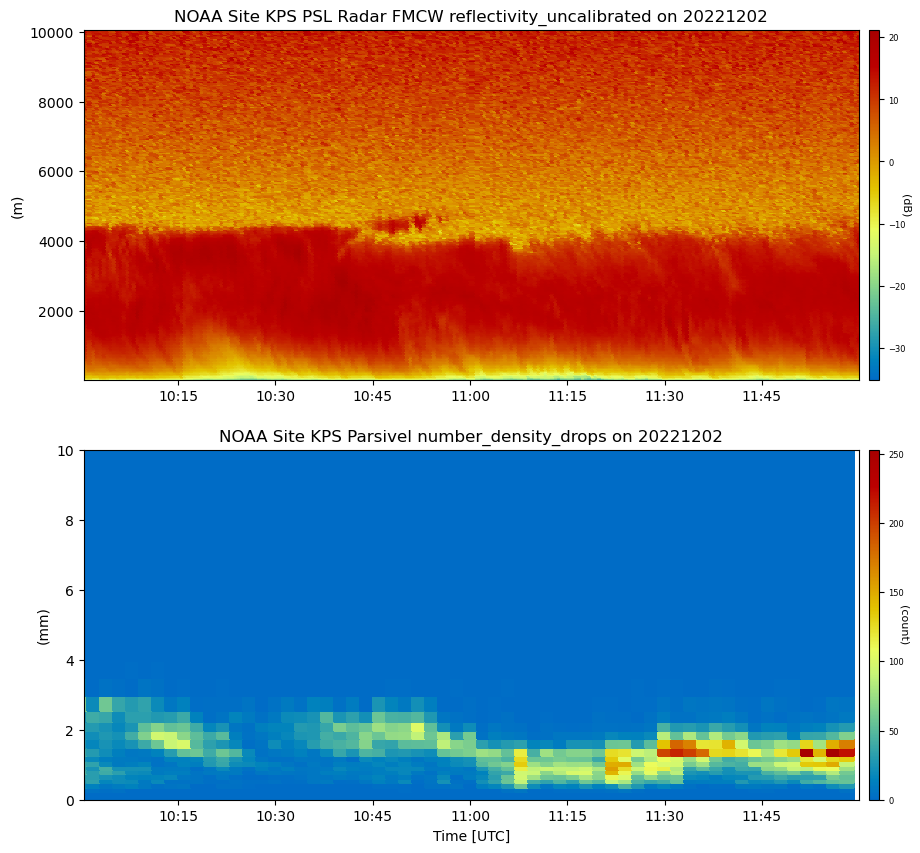

In [16]:
# Create a TimeSeriesDisplay object using both datasets.
display = act.plotting.TimeSeriesDisplay(
    {"NOAA Site KPS PSL Radar FMCW": radar_ds, "NOAA Site KPS Parsivel": parsivel_ds},
    subplot_shape=(2,), figsize=(10, 10))

# Plot PSL Radar followed by the parsivel data.
display.plot('reflectivity_uncalibrated', dsname='NOAA Site KPS PSL Radar FMCW',
             cmap='act_HomeyerRainbow', subplot_index=(0,))
display.plot('number_density_drops', dsname='NOAA Site KPS Parsivel',
             cmap='act_HomeyerRainbow', subplot_index=(1,))
# Adjust ylims of parsivel plot.
display.axes[1].set_ylim([0, 10])
plt.show()

## In-Situ Precipitation Accumulation at the AMF2 site

In [17]:
username = 'armlive_training'
token = '6f097a7b99e39d19'

# Access the laser disdrometer data
laser_disdrometer_files = act.discovery.download_data(username=username,
                                                      token=token,
                                                      datastream="gucldM1.b1",
                                                      startdate="2022-12-02",
                                                      enddate="2022-12-02")

# Read the laser disdrometer data into an xarray dataset
laser_disdrometer_ds = act.io.read_netcdf(laser_disdrometer_files)

# Access the laser disdrometer data
pluvio_files = act.discovery.download_data(username=username,
                                       token=token,
                                       datastream="gucwbpluvio2M1.a1",
                                       startdate="2022-12-02",
                                       enddate="2022-12-02")

# Read the pluvio files into an xarray dataset
pluvio_ds = act.io.read_netcdf(pluvio_files)

[DOWNLOADING] gucldM1.b1.20221202.000000.cdf
[DOWNLOADING] gucwbpluvio2M1.a1.20221202.000000.nc


### Filter Data

In [18]:
disdrometer_precip_rate = laser_disdrometer_ds.where(laser_disdrometer_ds.qc_precip_rate == 0).precip_rate.compute()
gauge_precip_rate = pluvio_ds.where(pluvio_ds.pluvio_status == 0).intensity_rtnrt.compute()

### ACT Utility to Calculate Total Preciptiation

In [19]:
disdrometer_precip_accum = act.utils.accumulate_precip(laser_disdrometer_ds.where(laser_disdrometer_ds.qc_precip_rate == 0), "precip_rate").precip_rate_accumulated.compute()
gauge_precip_accum = act.utils.accumulate_precip(pluvio_ds.where(pluvio_ds.pluvio_status == 0), "intensity_rtnrt").intensity_rtnrt_accumulated.compute()

/opt/homebrew/Caskroom/miniforge/base/envs/arm-cookbook-dev/lib/python3.9/site-packages/act/utils/data_utils.py:503: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  t_delta = stats.mode(diff).mode
/opt/homebrew/Caskroom/miniforge/base/envs/arm-cookbook-dev/lib/python3.9/site-packages/act/utils/data_utils.py:503: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the va

## Display the Accumulation

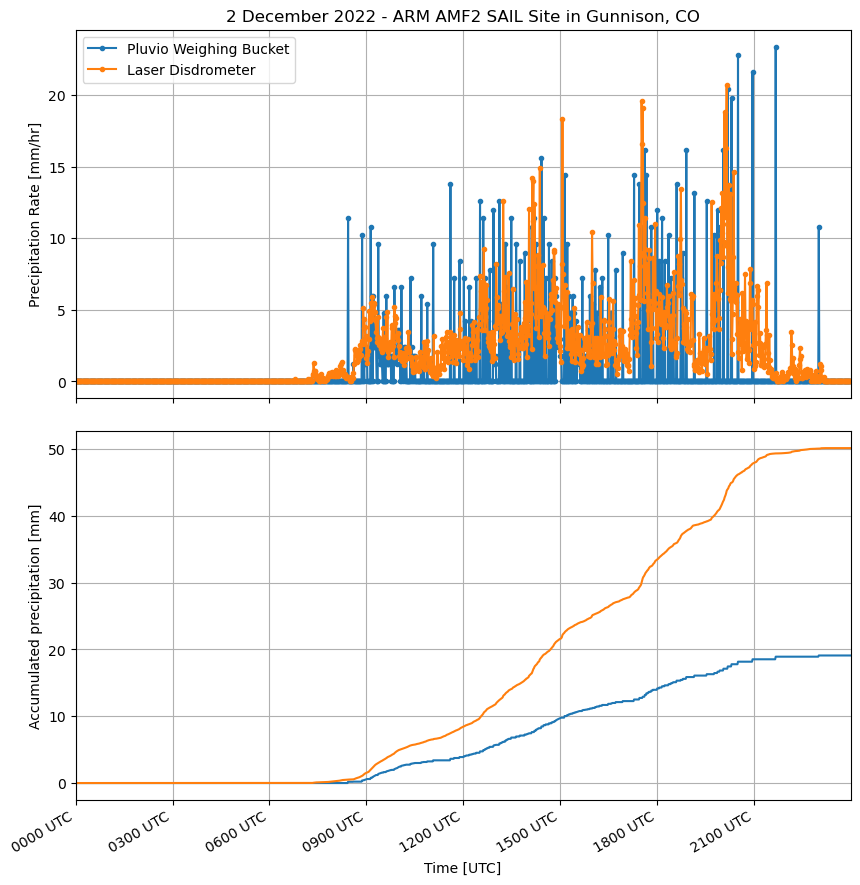

In [20]:
from matplotlib.dates import DateFormatter

date_form = DateFormatter("%H%M UTC")

# Create a matplotlib figure
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,10))
# Adjust subplot width
fig.subplots_adjust(hspace=0.09)

# Create a display object for the Pluvio
display = act.plotting.TimeSeriesDisplay({'gucwbpluvio2M1' : pluvio_ds, 'gucldM1' : laser_disdrometer_ds})
print(display)
# Assign the ACT display object to the matplotlib figure subplot
display.assign_to_figure_axis(fig, ax[0])
# Datastream Names are needed for plotting!
display.plot('intensity_rtnrt', dsname='gucwbpluvio2M1', label='Pluvio Weighing Bucket')
display.plot('precip_rate', dsname='gucldM1', label='Laser Disdrometer')

# Use inherent xarray plotting for accumulations
gauge_precip_accum.plot(ax=ax[1], label='Pluvio Weighing Bucket')
disdrometer_precip_accum.plot(ax=ax[1], label='Laser Disdrometer')
#gauge_precip_accum.plot(ax=ax[1], label='Pluvio Weighing Bucket')

# Update axe information and formatting!
ax[0].set_ylabel('Precipitation Rate [mm/hr]')
ax[0].set_xlabel('')
# Add gridlines
ax[0].grid(True)
# Add a title
ax[0].set_title('2 December 2022 - ARM AMF2 SAIL Site in Gunnison, CO')

ax[1].xaxis.set_major_formatter(date_form)
ax[1].set_xlabel('Time [UTC]')
ax[1].grid(True)

---

## Conclusions and Additional Resources
Within this notebook, we detailed the key functionality of the Atmospheric data Community Toolkit (ACT), and how to go about analyzing different atmospheric and climate datasets using this package.

If you are interested in additional examples, be sure to check out:
- The [ACT Example Gallery](https://arm-doe.github.io/ACT/source/auto_examples/index.html)
- Our [SAIL precipitation estimation from radar repository](https://arm-development.github.io/sail-xprecip-radar/radar-precip/plot-method-description-figure.html)